# Morse_theory_based_analyzer

## Useful functions

In [1]:
from SBL.SBL_pytools import SBL_pytools as sblpyt
help(sblpyt)
 

Help on class SBL_pytools in module SBL_pytools:

class SBL_pytools(builtins.object)
 |  Static methods defined here:
 |  
 |  convert_eps_to_png(ifname, osize)
 |  
 |  convert_pdf_to_png(ifname, osize)
 |  
 |  find_and_convert(suffix, odir, osize)
 |      # find file with suffix, convert, and return image file
 |  
 |  find_and_show_images(suffix, odir, osize)
 |  
 |  find_file_in_output_directory(suffix, odir)
 |  
 |  show_eps_file(eps_file, osize)
 |  
 |  show_image(img)
 |  
 |  show_log_file(odir)
 |  
 |  show_pdf_file(pdf_file)
 |  
 |  show_row_n_images(images, size)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



## Analysing a density estimate with application to density based clustering
As a first illustration, we analyze the density estimated from a point cloud (in 2D here). Using persisstence, we select the most
persistent modes of the estimated density, and retrun one cluster for each mode.

/user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-Morse-theory-based-analyzer-nng-euclid-density-gauss.exe --points-file data/points-N200-d50.txt     --num-neighbors 8  --persistence-threshold -1.00         -d results-dens
find results-dens -name "*stable_manifold_partition.xml"
sbl-clusters-display.py -f data/points-N200-d50.txt -c results-dens/sbl-Morse-theory-based-analyzer-nng-euclid-density-gauss__stable_manifold_partition.xml -o results-dens
Figs displayed
/user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-Morse-theory-based-analyzer-nng-euclid-density-gauss.exe --points-file data/points-N200-d50.txt     --num-neighbors 8  --persistence-threshold 0.75         -d results-dens
find results-dens -name "*stable_manifold_partition.xml"
sbl-clusters-display.py -f data/points-N200-d50.txt -c results-dens/sbl-Morse-theory-based-analyzer-nng-euclid-density-gauss__stable_manifold_partition.xml -o results-dens
Figs displayed


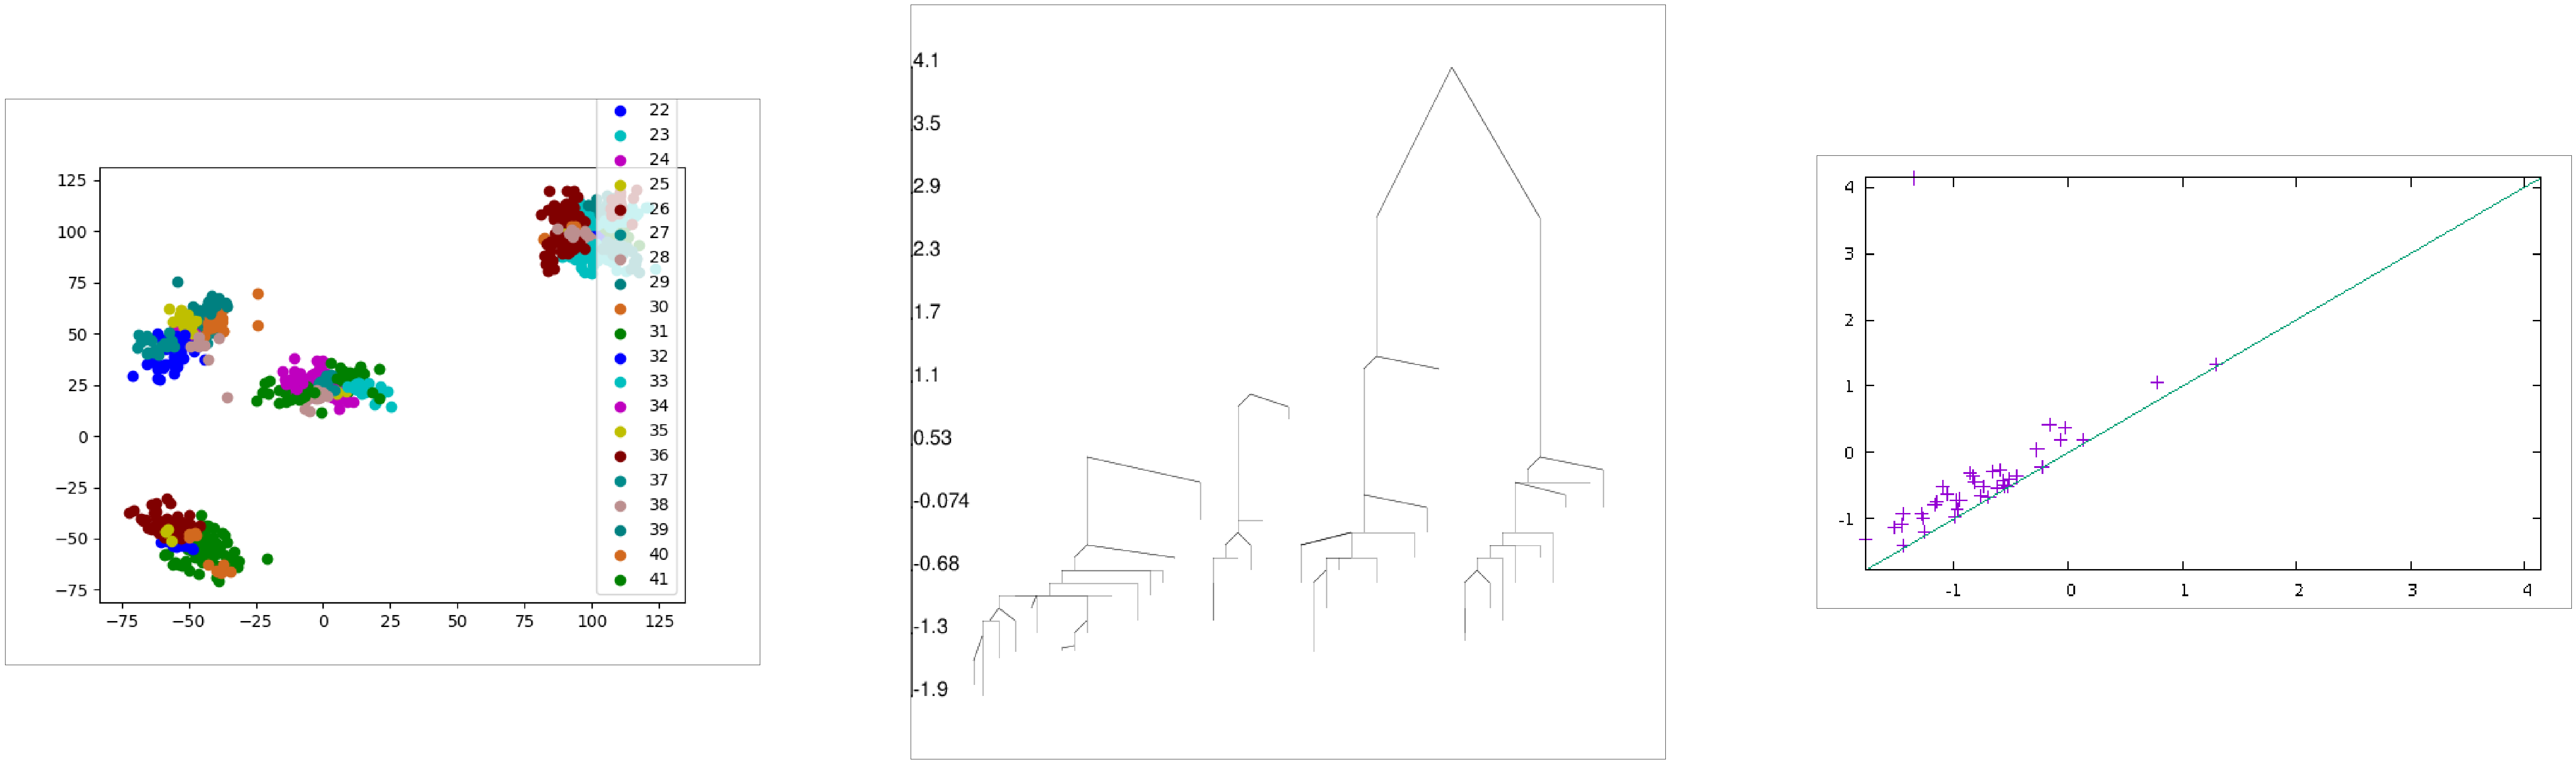

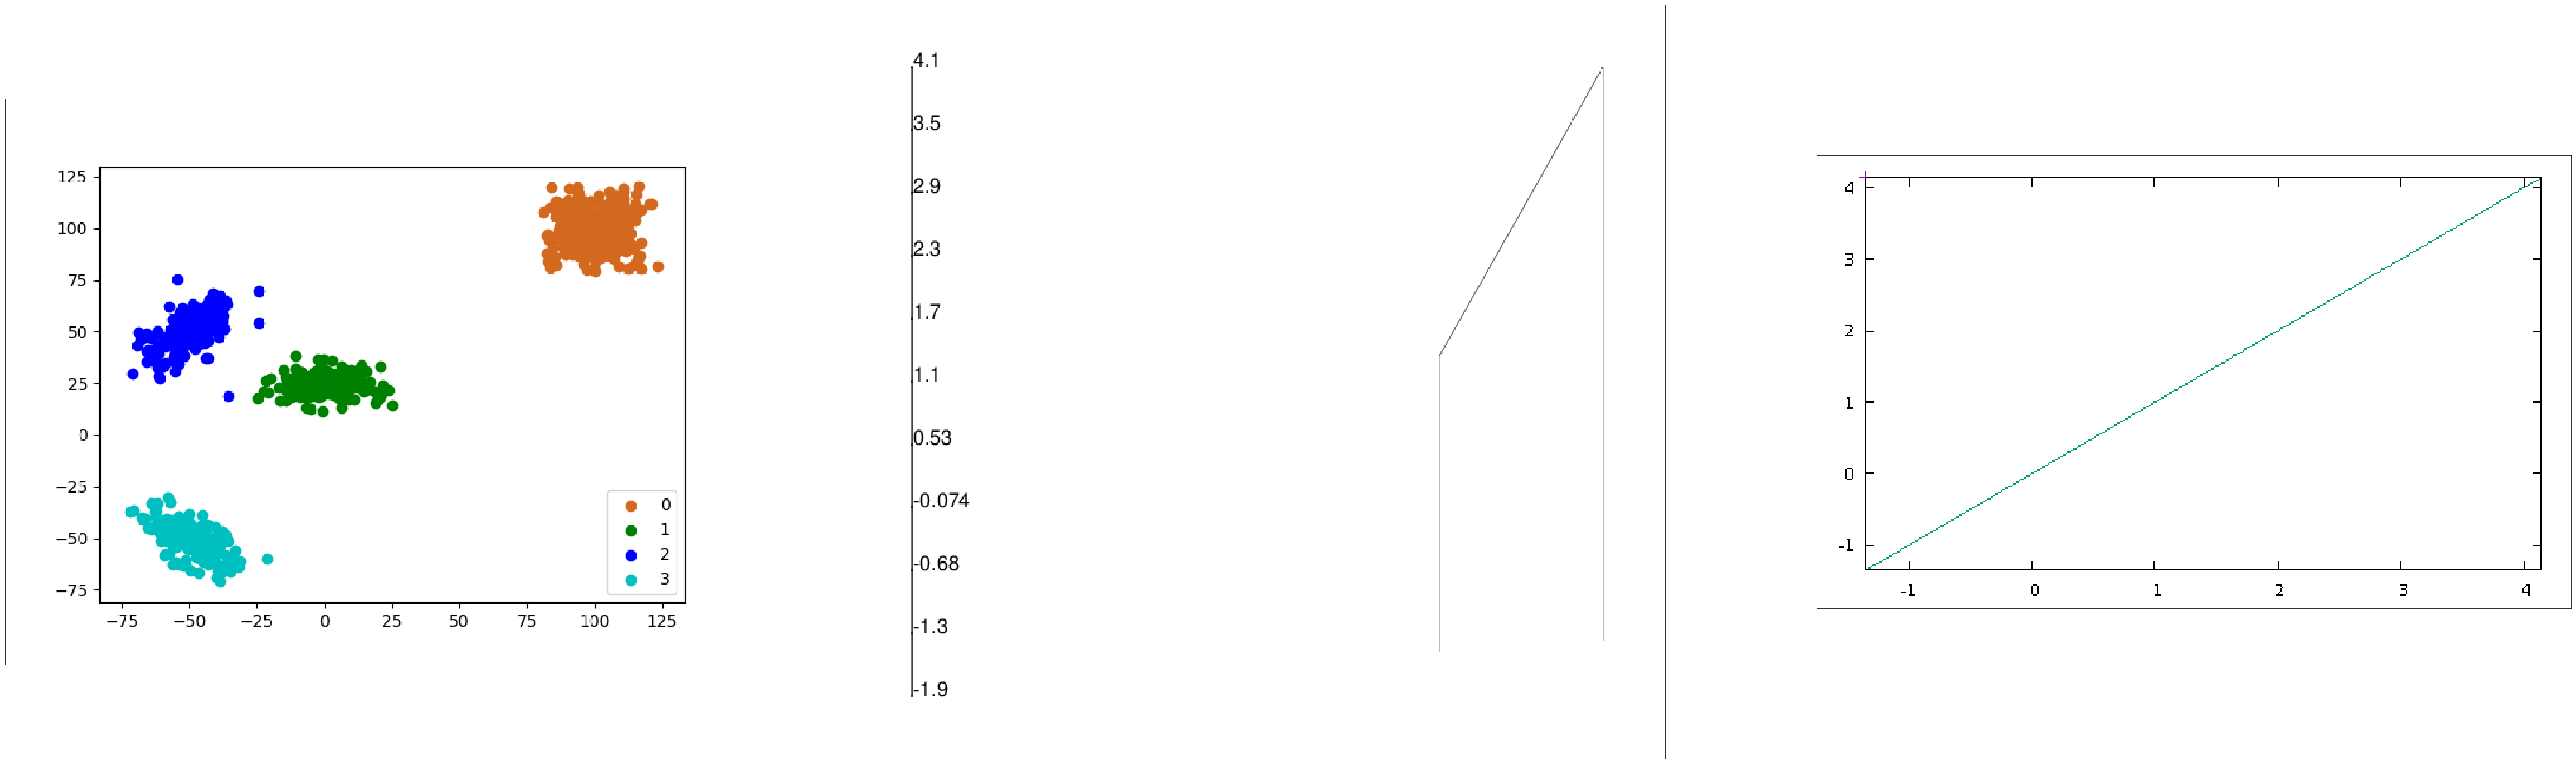

In [2]:
import os 
import shutil # python 3 only
import matplotlib.pyplot as plt
import matplotlib.image as mplimg


def analyze_density(ifile, num_neighbors = 8, persistence = -1):

    odir = "results-dens"
    if os.path.exists(odir):
        os.system("rm -rf %s" % odir)
    os.system( ("mkdir %s" % odir) )

    exe = shutil.which("sbl-Morse-theory-based-analyzer-nng-euclid-density-gauss.exe")
    if exe:
        cmd = "%s --points-file %s     --num-neighbors %d  --persistence-threshold %.2f \
        -d %s" % (exe, ifile, num_neighbors, persistence, odir)
        print(cmd)
        os.system(cmd)

        # find the partition of input points into clusters
        cmd = "find %s -name \"*stable_manifold_partition.xml\"" % odir
        print(cmd)
        xml_file = os.popen(cmd).readlines()[0].rstrip()

        # generate the image
        cmd = "sbl-clusters-display.py -f %s -c %s -o %s" % (ifile, xml_file,odir)
        print(cmd)
        os.system(cmd)

        # display images
        images = []
        images.append( sblpyt.find_and_convert("stable_manifold_partition.png", odir, 100) )
        images.append( sblpyt.find_and_convert("disconnectivity_forest.eps", odir, 100) )
        images.append( sblpyt.find_and_convert("persistence_diagram.pdf", odir, 100) )

        sblpyt.show_row_n_images(images, 100)
    else:
        print("Executable not found")

        
analyze_density("data/points-N200-d50.txt", persistence = -1)
analyze_density("data/points-N200-d50.txt", persistence = 0.75)

## Analyzing an edge weighted graph

We process a graph with weights on edges. Note that edges of the graph only are required. An edge is a pair of vertices represented by their indices, so that vertices are implicitely created from edge declarations.

Using executable /user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-Morse-theory-based-analyzer-wg.exe

All output files: ['sbl-Morse-theory-based-analyzer-wg__disconnectivity_forest.eps\n', 'sbl-Morse-theory-based-analyzer-wg__log.txt\n', 'sbl-Morse-theory-based-analyzer-wg__MSW_chain_complex.xml\n', 'sbl-Morse-theory-based-analyzer-wg__persistence_diagram.pdf\n', 'sbl-Morse-theory-based-analyzer-wg__persistence_diagram.plot\n', 'sbl-Morse-theory-based-analyzer-wg__persistence_diagram.txt\n', 'sbl-Morse-theory-based-analyzer-wg__persistence_histogram.pdf\n', 'sbl-Morse-theory-based-analyzer-wg__persistence_histogram.r\n', 'sbl-Morse-theory-based-analyzer-wg__persistence_histogram.txt\n', 'sbl-Morse-theory-based-analyzer-wg__stable_manifold_clusters.txt\n', 'sbl-Morse-theory-based-analyzer-wg__stable_manifold_partition.xml\n']
Figs displayed


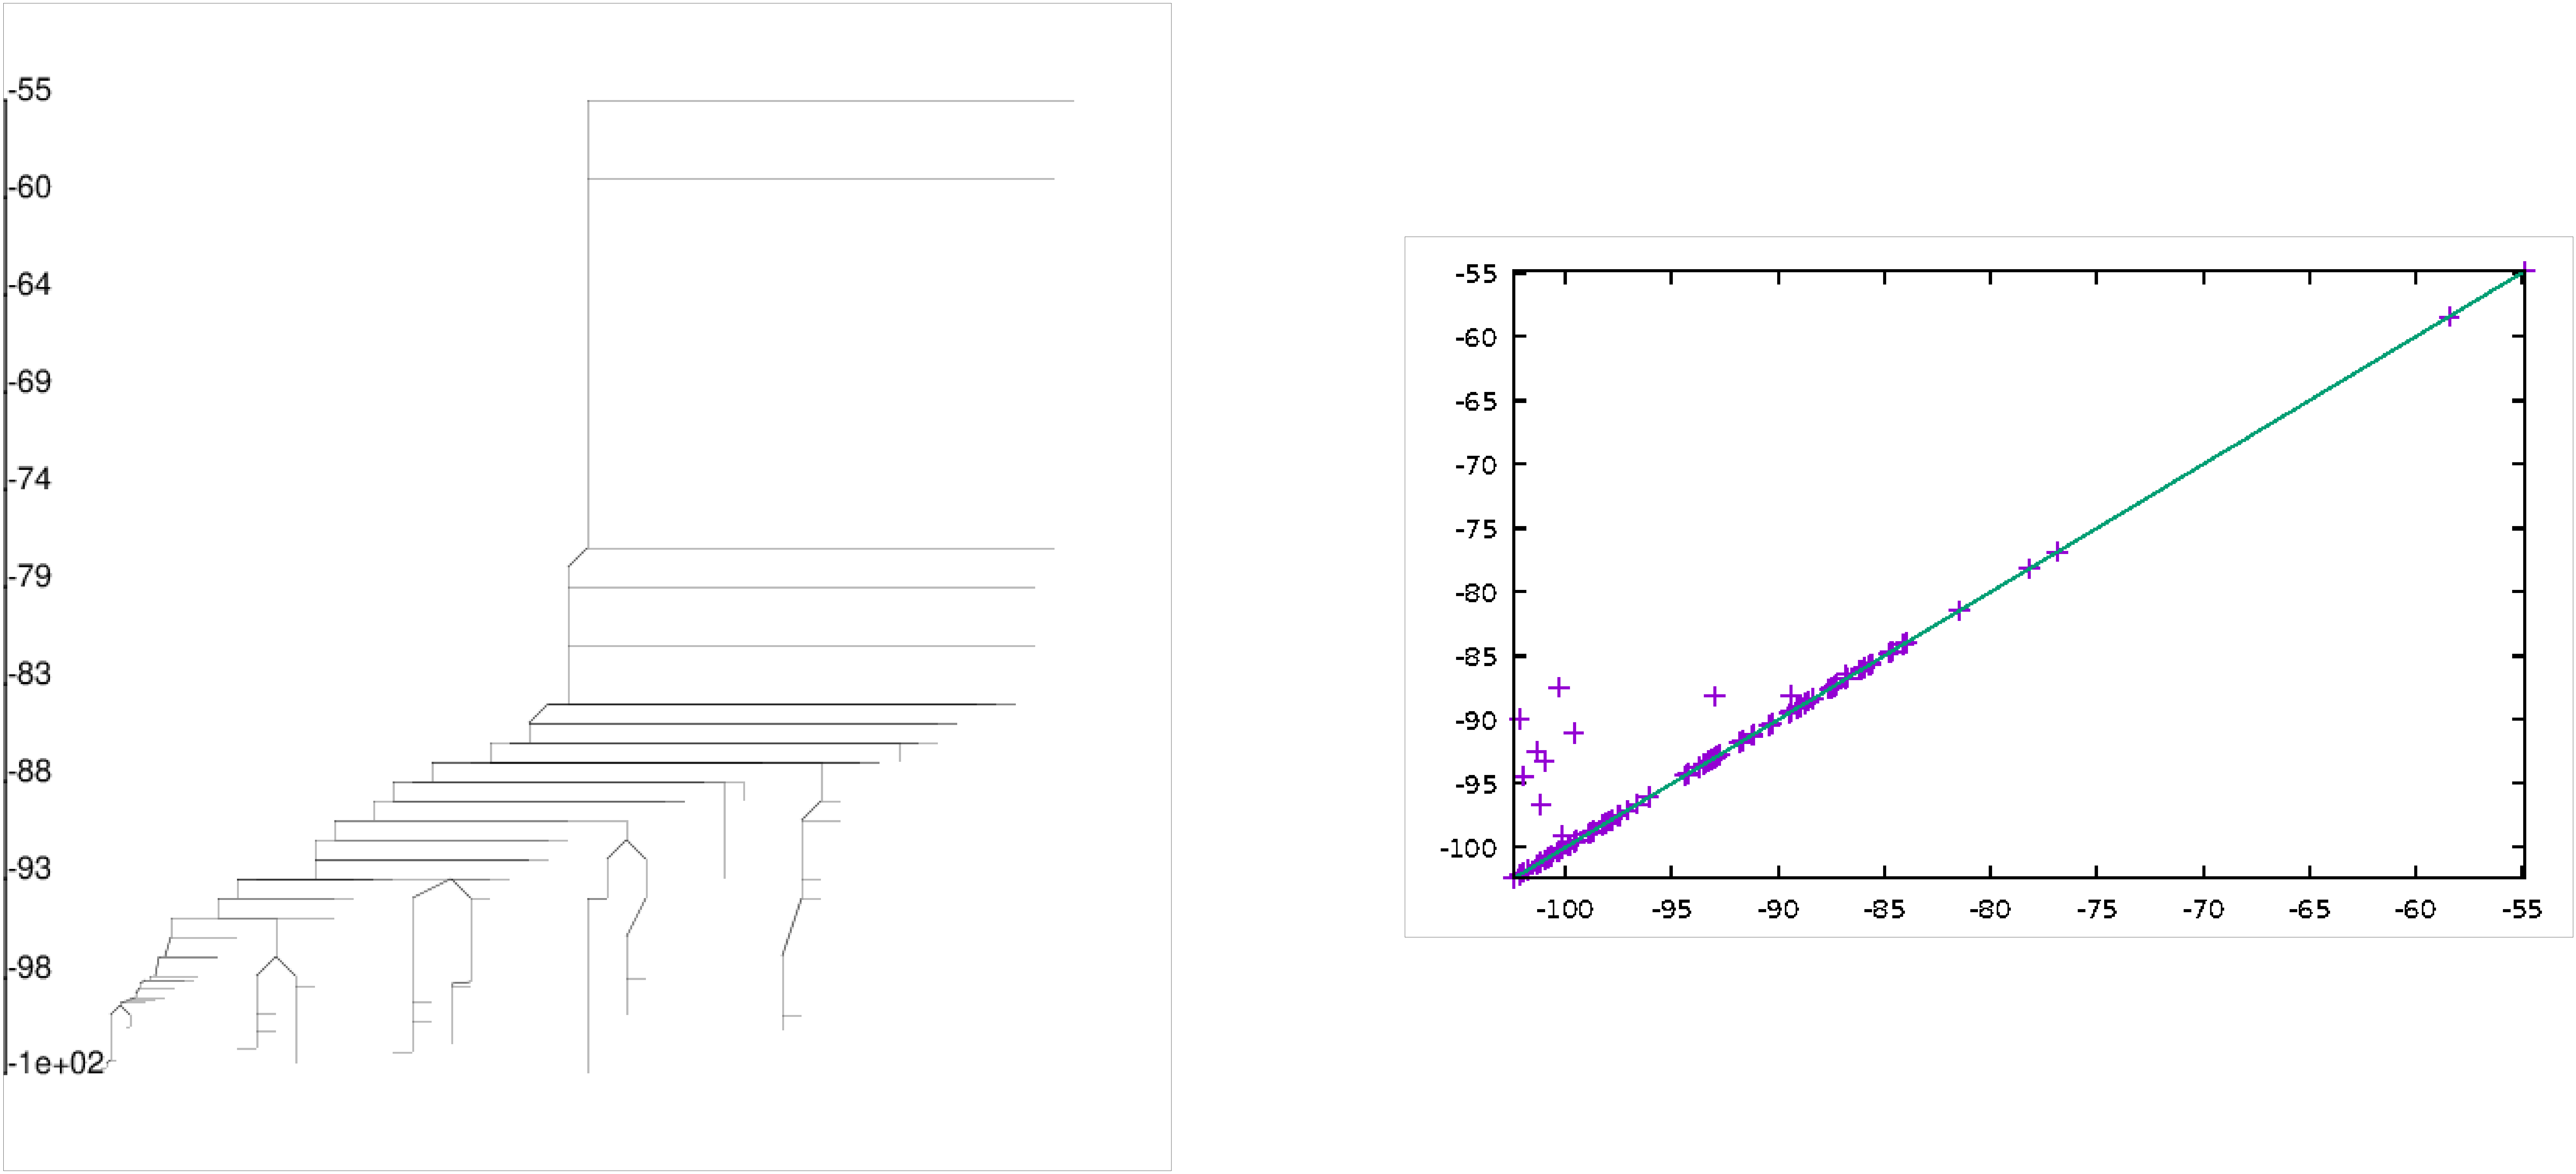

In [3]:
import sys #misc system
import os
import pdb
import shutil # python 3 only

def analyze_weighted_graph(edges, weights, vertexWeights = None, persistence = -1): 
    
    odir = "results-wg"
    if os.path.exists(odir):
        os.system("rm -rf %s" % odir)
    os.system( ("mkdir %s" % odir) )
    
    # check executable exists and is visible
    exe = shutil.which("sbl-Morse-theory-based-analyzer-wg.exe")
    if exe:
        print(("Using executable %s\n" % exe))
        cmd = "sbl-Morse-theory-based-analyzer-wg.exe -v -l -d %s\
               --edges-file %s --edge-weights-file %s --persistence-threshold %f" %\
            (odir, edges, weights, persistence)
        if vertexWeights:
            cmd += " --vertex-weights-file %s" % (vertexWeights)
        os.system(cmd)
        
        cmd = "ls %s" % odir
        ofnames = os.popen(cmd).readlines()
        print("All output files:",ofnames)
        
       # display_log_file(odir)
        images = []
        images.append( sblpyt.find_and_convert("disconnectivity_forest.eps", odir, 150) )

        images.append( sblpyt.find_and_convert("persistence_diagram.pdf", odir, 150) )

        sblpyt.show_row_n_images(images, 150)
           
    else:
        print("Executable not found")

analyze_weighted_graph("data/bln69_transitions.txt", "data/bln69_transitions_heights.txt")    
#analyze_weighted_graph("data/bln69_transitions.txt", "data/bln69_transitions_heights.txt", "data/bln69_sampling_heights.txt")    
        